# 랜덤포레스트 분류

In [84]:
import pandas as pd
df=pd.read_csv('ADP/ADP_book_ver01/data/breast-cancer.csv')

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [86]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [87]:
import numpy as np
from sklearn.model_selection import train_test_split
breast_dummy=pd.get_dummies(df,columns=['diagnosis'])

In [88]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_breast=le.fit_transform(df['diagnosis'])

In [90]:
diagnosis=pd.DataFrame({'diagnosis':le_breast})
diagnosis

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [91]:
features=['area_mean','texture_mean']  #설명변수
X=df[features]
y=diagnosis# 종속변수

In [74]:
y.value_counts()

diagnosis
0            357
1            212
Name: count, dtype: int64

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, stratify=y, random_state=11)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(398, 2) (171, 2)
(398, 1) (171, 1)


In [76]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [77]:
pred=model.predict(X_test)

In [78]:
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [79]:
model.score(X_test,y_test)

0.8947368421052632

In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

accuracy_score=accuracy_score(y_test,pred)
confusion_matrix=confusion_matrix(y_test,pred)
precision_score=precision_score(y_test,pred)
recall_score=recall_score(y_test,pred)
f1_score=f1_score(y_test,pred)

In [82]:
print("accuracy_score:",accuracy_score)
print("confusion_matrix:\n",confusion_matrix)
print("precision_score:",precision_score)
print("recall_score",recall_score)
print("f1_score:",f1_score)

accuracy_score: 0.8947368421052632
confusion_matrix:
 [[100   7]
 [ 11  53]]
precision_score: 0.8833333333333333
recall_score 0.828125
f1_score: 0.8548387096774194


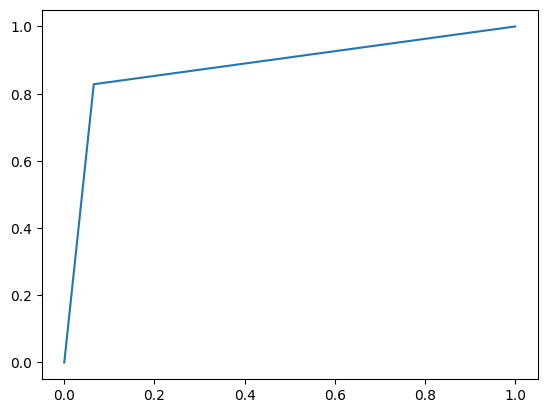

In [104]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

fpr,tpr, thres = roc_curve(y_test,pred, pos_label=1)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr)

In [106]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thres = roc_curve(y_test,pred, pos_label=1)
auc=auc(fpr,tpr)
auc

0.8813522196261682

# 랜덤포레스트 회귀

In [108]:
import pandas as pd
df=pd.read_csv('ADP\ADP_book_ver01\data\CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [111]:
df_num=df.select_dtypes(['number'])
df_num

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [112]:
features=list(df_num.columns.difference(['car_ID','symboling','price']))
X=df_num[features]
y=df_num['price']

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(143, 13) (62, 13)
(143,) (62,)


In [114]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [115]:
pred=model.predict(X_test)

In [116]:
pred

array([ 6943.87966667,  7322.67      ,  6991.3855    ,  7194.46      ,
        9497.99      , 29482.25      ,  7325.365     ,  6248.94      ,
        6991.3855    ,  9233.64      , 14869.99169   , 12726.70167   ,
       14626.02      ,  8526.97      , 13617.95      , 12290.755     ,
        9245.99      ,  7329.9825    , 17586.67668   , 10100.88      ,
       10452.59      ,  6954.185     , 14330.98      ,  8080.72      ,
       10948.575     ,  7479.73083333, 14556.12167   ,  8366.805     ,
        6489.65666667,  7313.31      ,  7865.09666667,  9969.43      ,
       32943.        , 12077.02666667, 15540.29      ,  8366.805     ,
        8056.39      , 35748.56      , 13389.72083333, 17973.96167   ,
        7292.175     , 17366.65835   ,  7147.31      ,  9726.42      ,
        8147.91      ,  7327.58166667, 40912.37      ,  6506.92      ,
       18748.79668   , 14900.55833667, 29599.505     , 16009.67      ,
       18832.8       ,  8030.59      , 10035.08      ,  7194.46      ,
      

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

mean_absolute_error=mean_absolute_error(y_test,pred)
mean_squared_error=mean_squared_error(y_test,pred)
mean_squared_log_error=mean_squared_log_error(y_test,pred)
r2_score=r2_score(y_test,pred)
acc=model.score(X_test,y_test)

In [118]:
print("mean_absolute_error:",mean_absolute_error)
print("mean_squared_error:",mean_squared_error)
print("mean_squared_log_error:",mean_squared_log_error)
print("r2_score:",r2_score)

mean_absolute_error: 1384.2942708602152
mean_squared_error: 4361555.650575856
mean_squared_log_error: 0.01750649930420009
r2_score: 0.9277536712620472


In [119]:
acc

0.9277536712620472